# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [35]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [36]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [37]:
ID = 2093708
np.random.seed(ID)

Now we load the dataset using the function above.

In [38]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [39]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 45 40 56 33 58 57 47 51 54]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [40]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


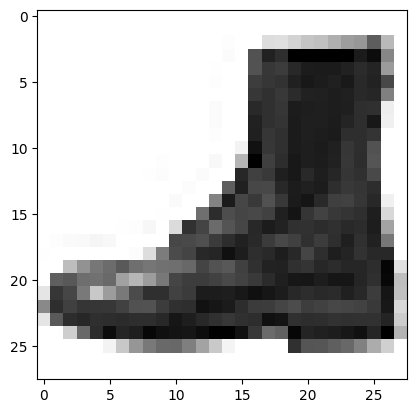

LABEL: 9
INPUT:


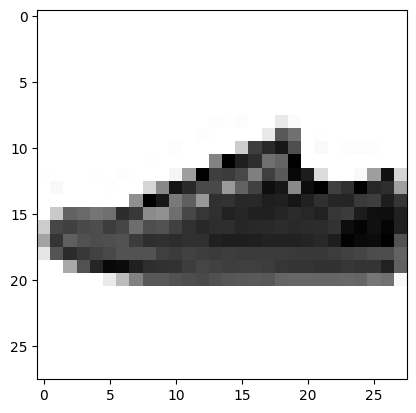

LABEL: 7
INPUT:


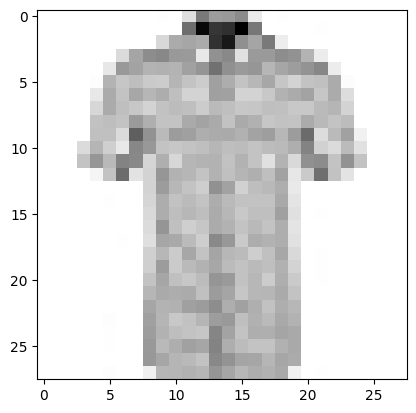

LABEL: 6


In [41]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [42]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv = GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5)

mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.30137871
Iteration 2, loss = 2.11844961
Iteration 3, loss = 1.97029250
Iteration 4, loss = 1.77456191
Iteration 5, loss = 1.57485008
Iteration 6, loss = 1.37596314
Iteration 7, loss = 1.16743744
Iteration 8, loss = 1.03338957
Iteration 9, loss = 0.93708811
Iteration 10, loss = 0.86819473
Iteration 11, loss = 0.86169998
Iteration 12, loss = 0.91266687
Iteration 13, loss = 0.75429719
Iteration 14, loss = 0.71508772
Iteration 15, loss = 0.75768530
Iteration 16, loss = 0.69203517
Iteration 17, loss = 0.74180314
Iteration 18, loss = 0.69507642
Iteration 19, loss = 0.62449516
Iteration 20, loss = 0.57285333
Iteration 21, loss = 0.53408720
Iteration 22, loss = 0.52286790
Iteration 23, loss = 0.53107587
Iteration 24, loss = 0.51566158
Iteration 25, loss = 0.50476722
Iteration 26, loss = 0.60081056
Iteration 27, loss = 0.63468104
Iteration 28, loss = 0.46357257
Iteration 29, loss = 0.43540026
Iteration 30, loss = 0.43073360
Iteration 31, loss = 0.44445107
Iteration 32, los

C:\Users\Enrico\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 0.10256383
Iteration 61, loss = 0.10913460
Iteration 62, loss = 0.11656072
Iteration 63, loss = 0.11595006
Iteration 64, loss = 0.12577042
Iteration 65, loss = 0.14483717
Iteration 66, loss = 0.39154314
Iteration 67, loss = 0.33330619
Iteration 68, loss = 0.25917048
Iteration 69, loss = 0.09528919
Iteration 70, loss = 0.08820206
Iteration 71, loss = 0.08150676
Iteration 72, loss = 0.07779035
Iteration 73, loss = 0.07302624
Iteration 74, loss = 0.07068662
Iteration 75, loss = 0.06844089
Iteration 76, loss = 0.06891047
Iteration 77, loss = 0.07777548
Iteration 78, loss = 0.09694236
Iteration 79, loss = 0.06890418
Iteration 80, loss = 0.05907823
Iteration 81, loss = 0.06175697
Iteration 82, loss = 0.04797388
Iteration 83, loss = 0.04369562
Iteration 84, loss = 0.04401650
Iteration 85, loss = 0.04051394
Iteration 86, loss = 0.04043390
Iteration 87, loss = 0.03880954
Iteration 88, loss = 0.03590025
Iteration 89, loss = 0.03490732
Iteration 90, loss = 0.03504042
Iteratio

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2093708, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [43]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_cv.best_params_)

print("Score with best parameters:")
print(mlp_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(mlp_cv.cv_results_['mean_test_score'])):
    print(mlp_cv.cv_results_['params'][i], mlp_cv.cv_results_['mean_test_score'][i])


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.768

All scores on the grid:
{'hidden_layer_sizes': (10,)} 0.5980000000000001
{'hidden_layer_sizes': (50,)} 0.768
{'hidden_layer_sizes': (10, 10)} 0.43599999999999994
{'hidden_layer_sizes': (50, 50)} 0.764


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

Based on the results we have, it looks like increasing the number of hidden layers in the neural network can decrease its performance. This means that a NN having more layers with more neurons doesn't necessarely perform better than NN with less layers and less neurons.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [44]:
#get training and test error for the best NN model from CV

mlp = mlp_cv.best_estimator_

training_error = 1 - mlp.score(X_train, y_train)

test_error = 1 - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.223983


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [45]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 955, 1012, 1003, 1004, 1005,  957, 1003, 1023, 1018, 1020],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [46]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5)

mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 1.18080993
Iteration 2, loss = 0.66244338
Iteration 3, loss = 0.58121277
Iteration 4, loss = 0.56445021
Iteration 5, loss = 0.53675904
Iteration 6, loss = 0.51969804
Iteration 7, loss = 0.48506231
Iteration 8, loss = 0.47434746
Iteration 9, loss = 0.45818111
Iteration 10, loss = 0.45667048
Iteration 11, loss = 0.45780353
Iteration 12, loss = 0.44228393
Iteration 13, loss = 0.42454567
Iteration 14, loss = 0.43454960
Iteration 15, loss = 0.42172604
Iteration 16, loss = 0.40014318
Iteration 17, loss = 0.40809152
Iteration 18, loss = 0.38744126
Iteration 19, loss = 0.39815565
Iteration 20, loss = 0.38536711
Iteration 21, loss = 0.39812291
Iteration 22, loss = 0.37171259
Iteration 23, loss = 0.37357134
Iteration 24, loss = 0.37614187
Iteration 25, loss = 0.35568948
Iteration 26, loss = 0.35827316
Iteration 27, loss = 0.35783322
Iteration 28, loss = 0.35759814
Iteration 29, loss = 0.35604512
Iteration 30, loss = 0.34477132
Iteration 31, loss = 0.35013777
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2093708, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [47]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
mlp_large_cv.best_params_

print("Score with best parameters:")
mlp_large_cv.best_score_

print("\nAll scores on the grid:")
for i in range(len(mlp_large_cv.cv_results_['mean_test_score'])):
    print(mlp_large_cv.cv_results_['params'][i], mlp_large_cv.cv_results_['mean_test_score'][i])

RESULTS FOR NN

Best parameters set found:
Score with best parameters:

All scores on the grid:
{'hidden_layer_sizes': (10,)} 0.7883
{'hidden_layer_sizes': (50,)} 0.8382000000000002
{'hidden_layer_sizes': (10, 10)} 0.781
{'hidden_layer_sizes': (50, 50)} 0.8401


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

We use the same architecture as before, but the score we can observe is better than the previous result.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [48]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv.best_estimator_

training_error = 1 - best_mlp_large.score(X_train, y_train)

test_error = 1 - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.014900
Best NN test error: 0.153280


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

The designs of the top models are alike, and their test error has dropped. This implies that obtaining a sufficient amount of samples is just as crucial as selecting an appropriate design.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


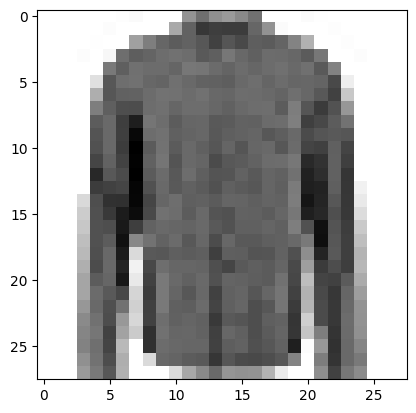

LABEL: 6
NN 500 prediction: 4
NN 10000 prediction: 6


In [49]:

y_pred = mlp_cv.predict(X_test)
y_large_pred = mlp_large_cv.predict(X_test)

for i in range(0, len(y_pred)):
  if y_pred[i] != y_large_pred[i] and y_large_pred[i] == y_test[i]:
    plot_input(X_test, y_test, i)
    print("NN 500 prediction: %s" % y_pred[i])
    print("NN 10000 prediction: %s" % y_large_pred[i])
    break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


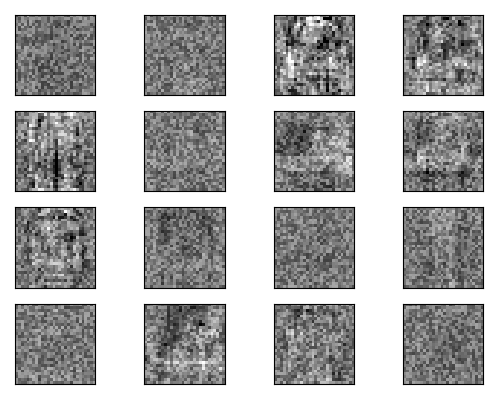

Weights with 10000 data points:


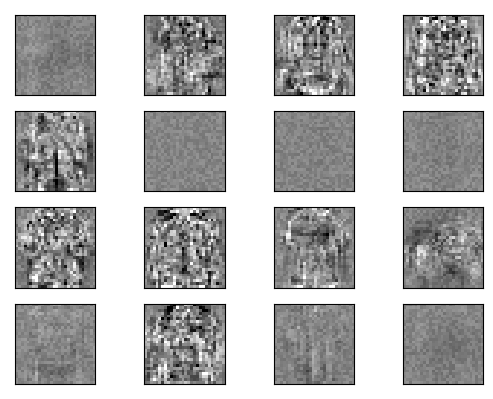

In [50]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

The model trained on 10000 data points generated weights that resulted in more distinct patterns, making it easier for both the model and the human eye to recognize the images. However, it is important to note that the way the model processes the images may differ from the way a human does.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**Perceptron model. Parameters: random_state = ID.**

In [51]:
from sklearn.linear_model import Perceptron

perc_model = Perceptron(random_state = ID)
perc_model.fit(X_train, y_train)

training_error_other = 1 - perc_model.score(X_train, y_train)

test_error_other = 1 - perc_model.score(X_test, y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.186400
Best test error (other model): 0.233140


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

It appears that the neural network (NN) classifier performed better than the perceptron classifier on both the training and test sets. The NN had a lower training error and a lower test error, which indicates that it was able to generalize better to unseen data. However, we need to say that the perceptron is definetely a simpler model compared to a NN and its test error is still not too high compared to the first one. 

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [52]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [53]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [54]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID).fit(X_train)

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

[[  2   1  60   2   0   7   1 107   0   2]
 [  4   0  11   1   0 196   0   9   0   0]
 [ 60   0  51  77   0   0   0   2   0   0]
 [  2   0  34   0   0 105   0  47   0   0]
 [ 83   0  30  39   0   3   0  39   0   1]
 [  0 141  45   0   9   0   0   0  21   0]
 [ 52   0  72  32   0   0   0  50   0   2]
 [  0 178   0   0   0   0   1   0  19   0]
 [  0  11  21  11   0   0  74   1   0  85]
 [  0   7   0   0  71   0   0   0 121   0]]


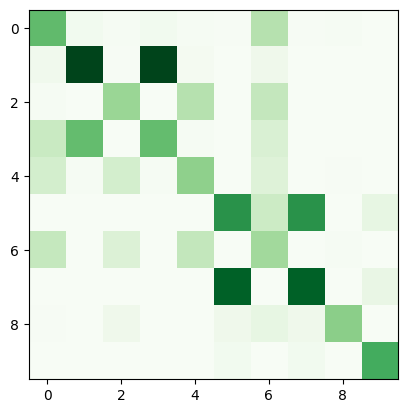

[[107.   7.   2.   7.   2.   1.  60.   1.   2.   0.]
 [  9. 196.   1. 196.   4.   0.  11.   0.   0.   0.]
 [  2.   0.  77.   0.  60.   0.  51.   0.   0.   0.]
 [ 47. 105.   0. 105.   2.   0.  34.   0.   0.   0.]
 [ 39.   3.  39.   3.  83.   0.  30.   0.   1.   0.]
 [  0.   0.   0.   0.   0. 141.  45. 141.   0.  21.]
 [ 50.   0.  32.   0.  52.   0.  72.   0.   2.   0.]
 [  0.   0.   0.   0.   0. 178.   0. 178.   0.  19.]
 [  1.   0.  11.   0.   0.  11.  21.  11.  85.   0.]
 [  0.   0.   0.   0.   0.   7.   0.   7.   0. 121.]]


In [55]:
# compute and print the contingency matrix for the true labels vs the clustering assignments

mat = metrics.cluster.contingency_matrix(y_train, kmeans.labels_)
print(mat)
mat1=np.zeros([10,10])
for i in range(10):
    col=mat[:,i]
    index=np.argmax(mat[i,:])
    mat1[:,i]=mat[:,index]
    
plt.imshow(mat1/mat.max(), cmap="Greens")
plt.show()
print(mat1)



## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

A contingency matrix is a table that shows the frequency or count of different combinations of two categorical variables. The main diagonal indicates that Kmeans adheres kind of good to the true labels.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [56]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID).fit(X_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.labels_)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19419979013713823
Silhoutte coefficient for number of clusters=3: 0.18341567659973923
Silhoutte coefficient for number of clusters=4: 0.18168684810652957
Silhoutte coefficient for number of clusters=5: 0.16449543706515857
Silhoutte coefficient for number of clusters=6: 0.15567410800658205
Silhoutte coefficient for number of clusters=7: 0.16727065079991524
Silhoutte coefficient for number of clusters=8: 0.15882430574197218
Silhoutte coefficient for number of clusters=9: 0.15704324491850077
Silhoutte coefficient for number of clusters=10: 0.15235553969895932
Silhoutte coefficient for number of clusters=11: 0.1504811973078791
Silhoutte coefficient for number of clusters=12: 0.13793593712026064
Silhoutte coefficient for number of clusters=13: 0.13049575871692978
Silhoutte coefficient for number of clusters=14: 0.12901295032247329
Silhoutte coefficient for number of clusters=15: 0.12502830312348776


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

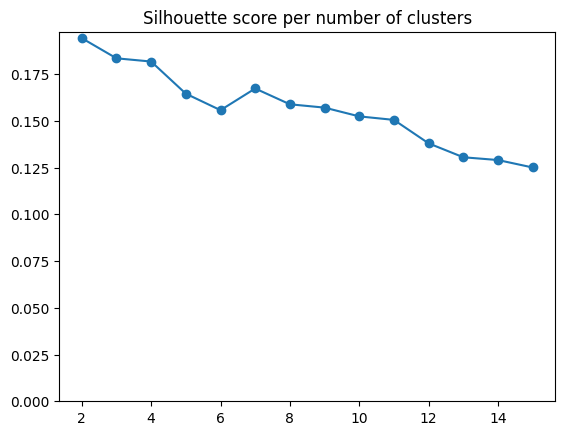

In [57]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

I think the best value to pick is the maximum one. So, in this case I would pick k=2.